In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/diminos_data.csv")
print("Shape of data:",df.shape)
df.head(3)

Shape of data: (15000, 3)


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [9]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[s] 
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), datetime64[s](1), int64(1)
memory usage: 351.7 KB


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [10]:
df["delivery_time_min"] = (df["order_delivered_at"] - df["order_placed_at"]).dt.total_seconds() / 60.0
df

,order_id,order_placed_at,order_delivered_at,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,15.963506


In [12]:
df['order_date'] = df['order_placed_at'].dt.date
df['order_day']=df['order_placed_at'].dt.day_name()
df['order_hour']=df['order_placed_at'].dt.hour
df.sample(3)

,order_id,order_placed_at,order_delivered_at,delivery_time_min,order_date,order_day,order_hour
12282,1535393,2023-03-23 02:42:21,2023-03-23 03:01:27.134420,19.102240,2023-03-23,Thursday,2
94,1523205,2023-03-01 03:50:41,2023-03-01 04:06:38.552637,15.959211,2023-03-01,Wednesday,3
273,1523384,2023-03-01 11:48:54,2023-03-01 12:04:22.521228,15.475354,2023-03-01,Wednesday,11


In [13]:
#Descriptive stats for delivery time in minutes
df['delivery_time_min'].describe()

,delivery_time_min
count,15000.000000
mean,20.499389
std,96.160362
min,15.000010
25%,15.274826
50%,15.797986
75%,17.279661
max,7299.831375


<Axes: ylabel='delivery_time_min'>

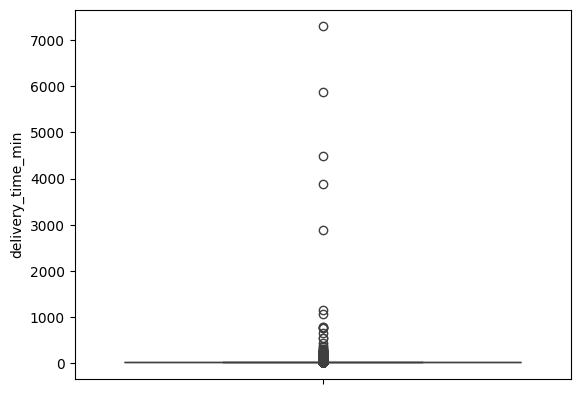

In [14]:
sns.boxplot(df['delivery_time_min'])

In [18]:
df['delivery_time_min'].sort_values(ascending=False)

,delivery_time_min
5499,7299.831375
4165,5867.434753
10225,4485.891210
14155,3888.444088
10007,2883.124250
...,...
9518,15.000373
3083,15.000070
10217,15.000048
6037,15.000029


In [19]:
df_filtered = df[df['delivery_time_min'] <= 180]
print("Shape of data after removing outliers:", df_filtered.shape)
df_filtered['delivery_time_min'].describe()

Shape of data after removing outliers: (14959, 7)


,delivery_time_min
count,14959.000000
mean,17.998539
std,9.042208
min,15.000010
25%,15.273692
50%,15.793746
75%,17.258591
max,177.277514


In [24]:
import numpy as np
p95_percentile=np.percentile(df_filtered['delivery_time_min'],95)
print(f"95th percentile of delivery time:{p95_percentile:.2f} min")

95th percentile of delivery time:26.53 min


In [26]:
failure_rate = (df_filtered['delivery_time_min'] > 31).sum() / df_filtered.shape[0]
print(f"Failure Rate: {failure_rate:.2%}")

Failure Rate: 3.45%


In [30]:

hourly_p95_percentiles = df_filtered.groupby('order_hour')['delivery_time_min'].quantile(0.95)
byTime_p95_percentile = hourly_p95_percentiles.mean()

print(f"Average of 95th percentile of delivery time across all hours: {byTime_p95_percentile:.2f} min")

Average of 95th percentile of delivery time across all hours: 26.65 min


In [32]:

day_p95_percentiles = df_filtered.groupby('order_day')['delivery_time_min'].quantile(0.95)
byDay_p95_percentile = day_p95_percentiles.mean()

print(f"Average of 95th percentile of delivery time across all hours: {byDay_p95_percentile:.2f} min")

Average of 95th percentile of delivery time across all hours: 26.65 min


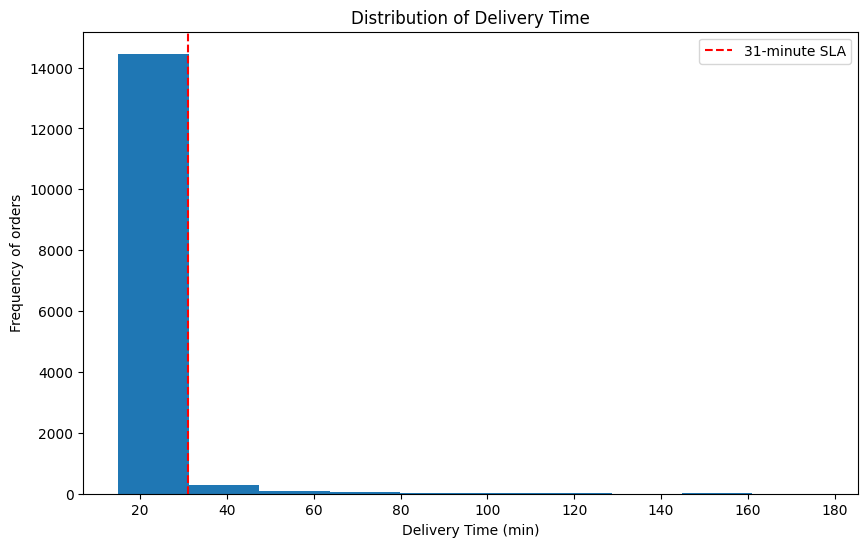

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['delivery_time_min'])
plt.axvline(31, color="red", linestyle="--", label="31-minute SLA")
plt.xlabel('Delivery Time (min)')
plt.ylabel('Frequency of orders')
plt.title('Distribution of Delivery Time')
plt.legend()
plt.show()

In [61]:
daily_stats = (
    df_filtered.groupby("order_date")["delivery_time_min"]
      .agg(["count", "mean", "median", "max", lambda x: x.quantile(0.95)])
      .rename(columns={"<lambda_0>": "p95"})
      .reset_index()
)

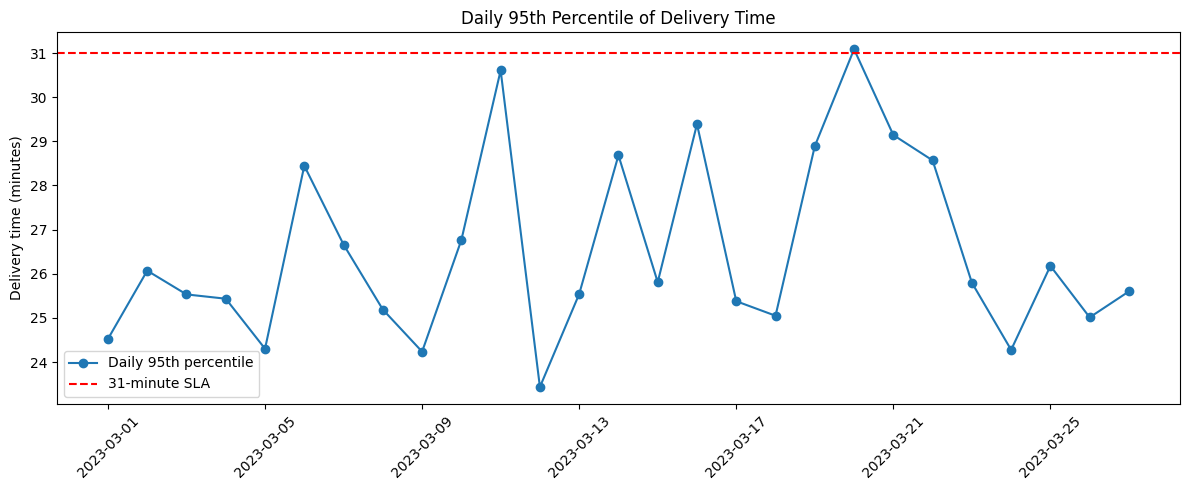

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(daily_stats["order_date"], daily_stats["p95"], marker="o", label="Daily 95th percentile")
plt.axhline(31, color="red", linestyle="--", label="31-minute SLA")
plt.xticks(rotation=45)
plt.ylabel("Delivery time (minutes)")
plt.title("Daily 95th Percentile of Delivery Time")
plt.legend()
plt.tight_layout()
plt.show()

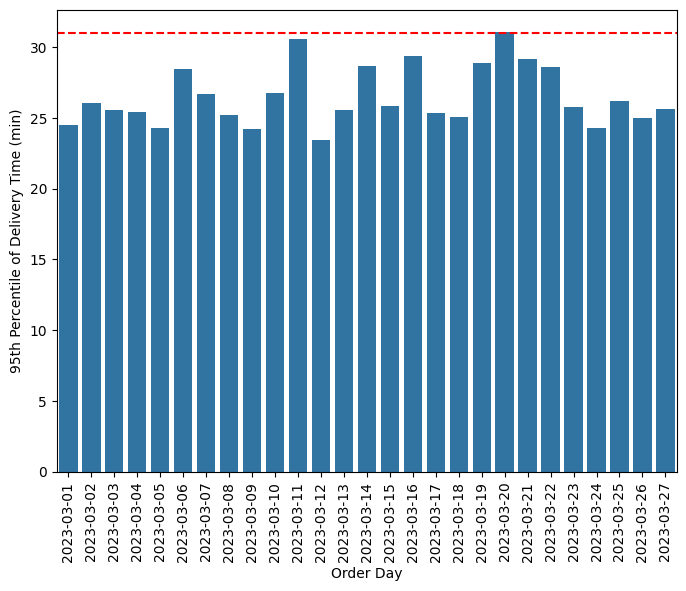

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(data=daily_stats, x="order_date", y="p95")
plt.axhline(31, color="red", linestyle="--", label="31-minute SLA")
plt.xlabel('Order Day')
plt.ylabel('95th Percentile of Delivery Time (min)')
plt.xticks(rotation=90)
plt.show()

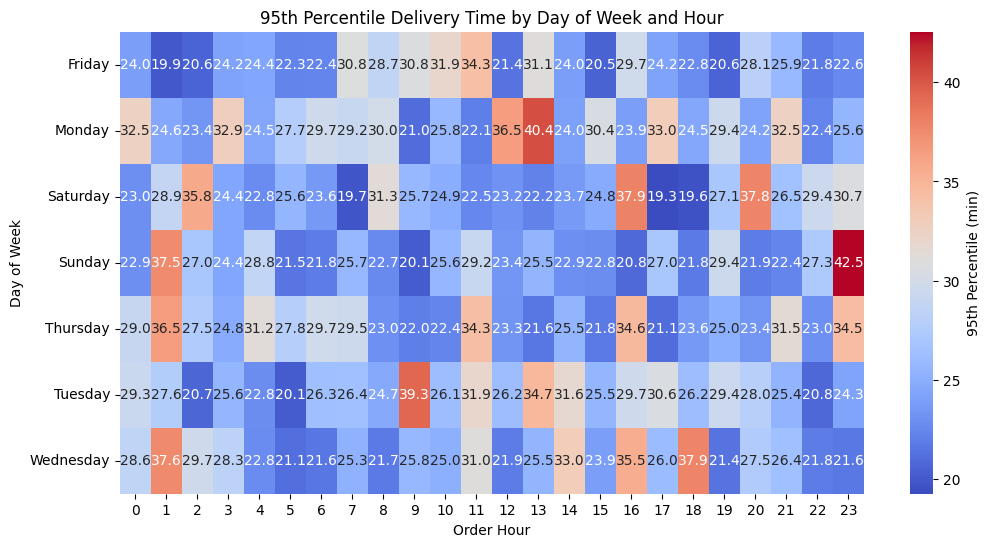

In [77]:
heatmap_data = df_filtered.groupby(['order_day', 'order_hour'])['delivery_time_min'].quantile(0.95).unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': '95th Percentile (min)'})
plt.title("95th Percentile Delivery Time by Day of Week and Hour")
plt.xlabel("Order Hour")
plt.ylabel("Day of Week")
plt.show()